<a href="https://colab.research.google.com/github/gagyeomkim/Deep-Learning-Paper-Review-and-Practice/blob/main/code_practice/Word2Vec2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Distributed Representations of Words and Phrases and their Compositionality(NIPS 2013)** 실습

- 본 코드는 Word2Vec의 방법 중에서도 **Skip-Gram** 방식을 구현합니다.
    - 본 논문은 자연어 처리 기법의 기본적인 구성을 이해하고 공부하는 데에 도움을 줍니다.
- 코드 실행전에 **[런타임] -> [런타임 유형 변경]**에서 유형을 **GPU**로 설정합니다.

code by: https://github.com/graykode/nlp-tutorial/blob/master/1-2.Word2Vec/Word2Vec-Skipgram(Softmax).py


- [nn.Linear의 weight 저장방법](https://docs.pytorch.org/docs/stable/generated/torch.nn.Linear.html)

In [53]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

Epoch: 1000, cost=1.793644
Epoch: 2000, cost=1.240288
Epoch: 3000, cost=1.418013
Epoch: 4000, cost=0.896586
Epoch: 5000, cost=0.660389


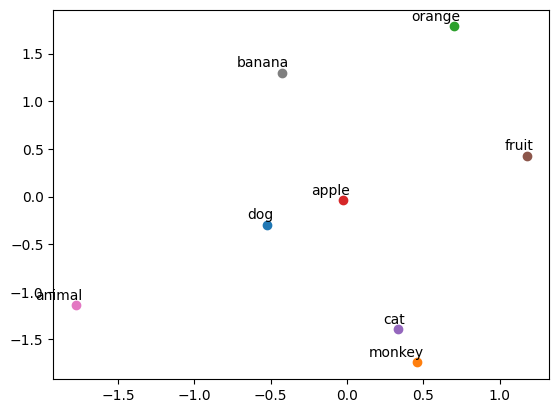

In [65]:
def random_batch():
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)  # replace=False: 비복원추출

    for i in random_index:
        random_inputs.append(np.eye(voc_size)[skip_grams[i][0]])    # target(one-hot vector)
        random_labels.append(skip_grams[i][1])  # context word(not one-hot vector), vocabulary에서 label의 index임

    return random_inputs, random_labels

# Model
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()
        # W and WT is not Transpose relationship
        self.W = nn.Linear(voc_size, embedding_size, bias=False)    # voc_size -> embedding_size Weight
        self.WT = nn.Linear(embedding_size, voc_size, bias=False)   # embedding_size -> voc_size Weight

    def forward(self, X):
        # X: [batch_size, voc_size]
        hidden_layer = self.W(X)    # hidden_layer: [batch_size, embedding_size]
        output_layer = self.WT(hidden_layer)    # output_layer: [batch_size, voc_size]
        return output_layer

if __name__ == '__main__':
    batch_size = 2  # mini-batch size
    embedding_size = 2  # embedding size

    sentences = ["apple banana fruit", "banana orange fruit", "orange banana fruit",
                 "dog cat animal", "cat monkey animal", "monkey dog animal"]

    word_sequence = " ".join(sentences).split()
    # vocabulary
    word_list = " ".join(sentences).split()
    word_list = list(set(word_list))
    word_dict = {w: i for i, w in enumerate(word_list)}    #word2index
    voc_size = len(word_dict)

    # Make skip gram of one size window
    skip_grams = []
    for i in range(1, len(word_sequence)-1):
        target = word_dict[word_sequence[i]]
        context = [word_dict[word_sequence[i-1]], word_dict[word_sequence[i+1]]]    # window_size=1
        for w in context:
            skip_grams.append([target, w])      # [target, context(=주변단어)]로 저장

    model = Word2Vec()

    criterion = nn.CrossEntropyLoss()   # softmax를 포함함
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # training
    for epoch in range(5000):
        input_batch, target_batch = random_batch()
        input_batch = torch.Tensor(input_batch)
        target_batch = torch.LongTensor(target_batch)

        optimizer.zero_grad()
        output = model(input_batch)

        # output: [batch_size, voc_size]
        # target_batch: [batch_size] (LongTensor, not one-hot)
        loss = criterion(output, target_batch)
        if (epoch+1)%1000 == 0:
            print(f'Epoch: {epoch+1}, cost={loss:.6f}')

        loss.backward()
        optimizer.step()

    for i, label in enumerate(word_list):
        # W: [embedding_dim, voc_size]
        # WT: [voc_size, embedding_dim]
        W, WT = model.parameters()
        # x: embedding의 첫번째 dimension
        # y: embedding의 두번째 dimension
        x, y = W[0][i].item(),  W[1][i].item()
        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')
    plt.show()

## code test

In [66]:
W.shape

torch.Size([2, 8])

In [67]:
WT.shape

torch.Size([8, 2])

In [68]:
skip_grams[1]   # [target, context]로 저장

[7, 5]

In [69]:
np.eye(voc_size)

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [70]:
print(target_batch)
print(output)
print(output.argmax(1))

tensor([5, 1])
tensor([[-1.8194, -1.0077,  0.8114,  0.9437, -1.2752,  2.3022, -2.3064,  0.1610],
        [-0.4672,  3.5891, -1.8122,  0.7920,  3.6225, -0.8269,  1.1446, -3.7162]],
       grad_fn=<MmBackward0>)
tensor([5, 4])


In [71]:
import torch.nn as nn

loss = nn.CrossEntropyLoss()
# Example of target with class indices
loss = nn.CrossEntropyLoss()
input = torch.tensor([[ 0.0717,  0.1584,  0.0227, -0.2727,  0.0198],
                      [ 0.0687,  0.0615, -0.2146,  0.0322,  0.0522],
                      [-0.2973,  0.0801,  0.0482,  0.0385,  0.1304]], requires_grad=True)
target = torch.tensor([3.0, 2.0, 0.0])
output = loss(input, target)
output.backward()

RuntimeError: expected scalar type Long but found Float